In [121]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt


solver_name = "EKF1_2"
problem_name = "samples_from_prior_FHN"
prefix = f"{solver_name}_{problem_name}"
folder = "./"

delta = 1 / 9
fineN = int(1 / delta)
T = 1/3
N = int(T / delta)
no_samples = 100

sampled_sols = jnp.load(f'{folder}/{prefix}_sampled_sols_{N}_1.npy')
sampled_sols=jnp.insert(sampled_sols, 0, jnp.zeros((2, )), axis=1)
euler_parabola_ode_sols=jnp.load(f'{folder}/{prefix}_pathwise_sols4_parabola_ode_{N}_{fineN}.npy')
fine_em = jnp.load(f'{folder}/{prefix}_pathwise_sols2_{N}_{fineN}.npy')
low_res_em = jnp.load(f'{folder}/{prefix}_pathwise_sols3_{N}_{fineN}.npy')
mean = jnp.load(f'{folder}/{prefix}_mean_pn_{N}_1.npy')
var = jnp.load(f'{folder}/{prefix}_var_pn_{N}_1.npy')
mean = jnp.insert(mean, 0, jnp.zeros((2, )), axis=0)
var = jnp.insert(var, 0, jnp.zeros((2, 2)), axis=0)

from functools import partial
@np.vectorize
def parabola(t):
    k = int(t/delta)
    u = t/delta - k
    w = brownian[0]
    dw = incs[0]
    i = parabola_coeffs[0]
    a = dw[k]
    b = i[k]
    c = w[k]
    para = c + a * u + b * jnp.sqrt(6) * u * (1 - u)
    dpara = a + b * jnp.sqrt(6)* (1/delta - 2 * u/delta)
    return para, dpara

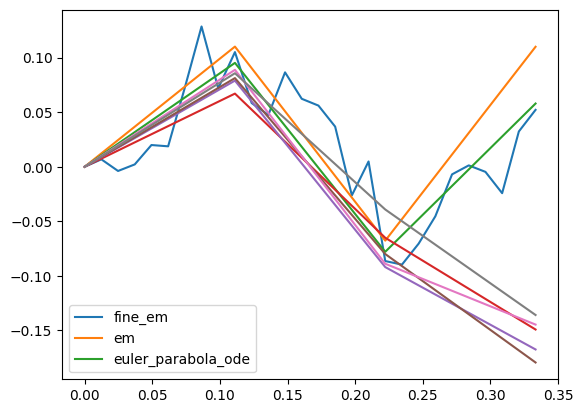

In [122]:
idx = 1
ts = jnp.linspace(0, T, int(N)+1)
fine_ts = jnp.linspace(0, T, int(N*fineN)+1)
plt.plot(fine_ts, fine_em[:,idx], label="fine_em")
plt.plot(ts, low_res_em[:,idx], label="em")
plt.plot(ts, euler_parabola_ode_sols[:,idx], label="euler_parabola_ode")

for i in range(5):
    plt.plot(ts, sampled_sols[i, :, idx], alpha=1)
    for _idx in range(2):
        np.savetxt(f'{prefix}_sampled_sols_{i}_{_idx}.csv', jnp.array([ts, sampled_sols[i, :, _idx]]).T,
                    delimiter=',', header='t,path', comments="")
        np.savetxt(f'{prefix}_sampled_sols_{i}_{_idx}.csv', jnp.array([ts, sampled_sols[i, :, _idx]]).T
                 , delimiter=',', header='t,path', comments="")
        np.savetxt(f'{prefix}_fine_em_sol_{_idx}.csv', jnp.array([fine_ts, fine_em[:, _idx]]).T,
                    delimiter=',', header='t,path', comments=""
                   )
        np.savetxt(f'{prefix}_low_res_em_sol_{_idx}.csv', jnp.array([ts, low_res_em[:, _idx]]).T,
                    delimiter=',', header='t,path', comments="")

plt.legend()

In [123]:
euler_parabola_ode_sols.shape

(4, 2)

In [124]:
fine_incs = jnp.load(f'{folder}/{prefix}_fine_incs_{N}_{fineN}.npy')
brownian_fine = jnp.cumsum(fine_incs, axis=1)
brownian_fine = jnp.insert(brownian_fine, 0, jnp.zeros((1, )), axis=1)
incs = jnp.load(f'{folder}/{prefix}_incs_{N}_{fineN}.npy')
brownian = jnp.cumsum(incs, axis=1)
brownian = jnp.insert(brownian, 0, jnp.zeros((1, )), axis=1)
parabola_coeffs = jnp.load(f'{folder}/{prefix}_parabola_coeffs_{N}_{fineN}.npy')

In [89]:
jax.grad(parabola)(0.5)

TracerArrayConversionError: The numpy.ndarray conversion method __array__() was called on traced array with shape float32[].
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerArrayConversionError

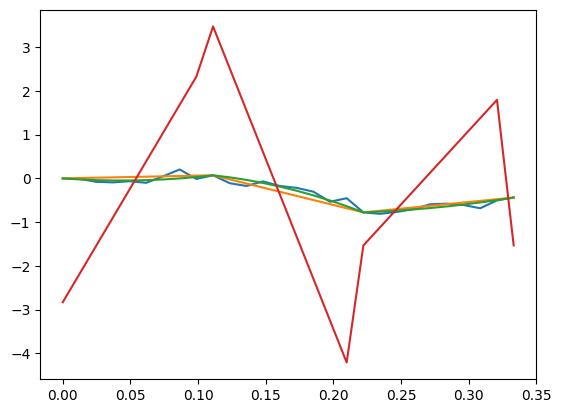

In [131]:

ts = jnp.linspace(0, T, int(N)+1)
fine_ts = jnp.linspace(0, T, int(N*fineN)+1)
plt.plot(fine_ts, brownian_fine[0])
plt.plot(ts, brownian[0])
para_traj, dpara_traj = parabola(fine_ts)
plt.plot(fine_ts, para_traj)
brownian_fine_reshaped = brownian_fine[0].reshape(-1, )
brownian_reshaped = brownian[0].reshape(-1, )
np.savetxt(f'para_traj.csv', jnp.array([fine_ts, para_traj]).T
                 , delimiter=',', header='t,path', comments="")

np.savetxt(f'brownian_fine.csv', jnp.array([fine_ts, brownian_fine_reshaped]).T
                 , delimiter=',', header='t,path', comments="")
np.savetxt(f'brownian.csv', jnp.array([ts, brownian_reshaped]).T
                 , delimiter=',', header='t,path', comments="")
plt.plot(fine_ts, dpara_traj)

In [132]:
dpara_traj

array([-2.8329    , -2.1876245 , -1.542349  , -0.8970734 , -0.25179785,
        0.39347768,  1.0387532 ,  1.6840287 ,  2.3293042 ,  3.4750228 ,
        2.514267  ,  1.5535104 ,  0.5927551 , -0.36800027, -1.3287567 ,
       -2.289513  , -3.2502685 , -4.211024  , -1.5341511 , -1.1179053 ,
       -0.7016599 , -0.28541458,  0.13083175,  0.54707706,  0.96332246,
        1.3795677 ,  1.7958131 , -1.5341507 ], dtype=float32)